In [3]:
!pip install emnist

In [5]:
!pip install tensorflow_datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label - 1

batch_size = 128
ds_train = ds_train.map(normalize_img).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, epochs=10, validation_data=ds_test)

test_loss, test_acc = model.evaluate(ds_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.MJKK8S_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.MJKK8S_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 91s 128ms/step - accuracy: 0.5479 - loss: 1.5273 - val_accuracy: 0.8672 - val_loss: 0.3961
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 136s 120ms/step - accuracy: 0.8261 - loss: 0.5533 - val_accuracy: 0.8906 - val_loss: 0.3245
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.8571 - loss: 0.4475 - val_accuracy: 0.9059 - val_loss: 0.2833
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.8728 - loss: 0.3932 - val_accuracy: 0.9081 - val_loss: 0.2695
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.8842 - loss: 0.3576 - val_accuracy: 0.9124 - val_loss: 0.2534
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.8916 - loss: 0.3323 - val_accuracy: 0.9184 - val_loss: 0.2447
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.8998 - loss: 0.3043 - val_accuracy: 0.9211 - val_loss: 0.2386
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.9064 - loss: 0.2851 - va

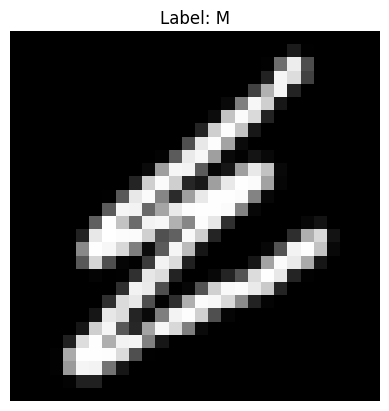

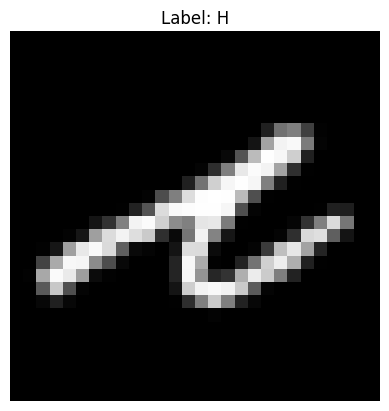

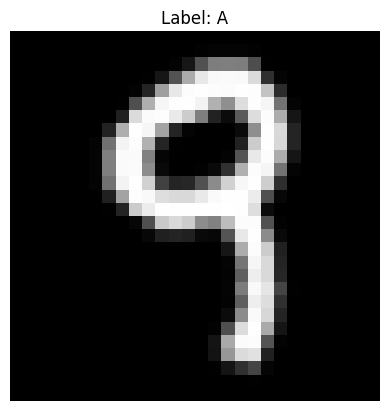

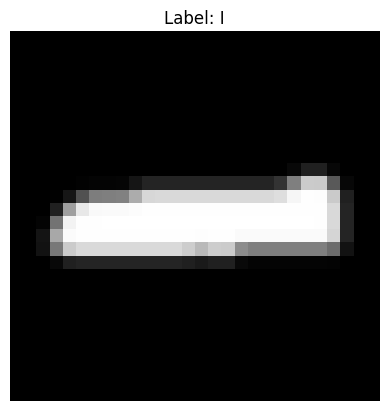

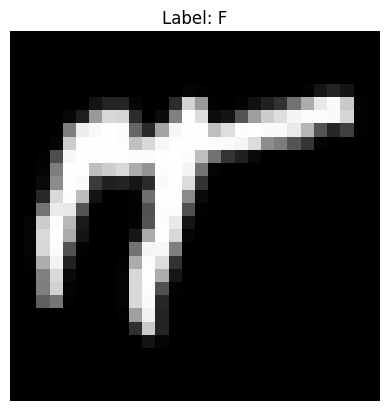

In [6]:
for images, labels in ds_test.take(1):
    for i in range(5):
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {chr(labels[i].numpy() + 65)}")
        plt.axis('off')
        plt.show()
